In [4]:
import pandas as pd

from prophet import Prophet
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from sqlalchemy import event
from sqlalchemy import text
import os
from dotenv import load_dotenv
import sys
import warnings

In [5]:
sys.path.append(os.path.abspath('..'))
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
from src.data_tool.connect_db import ConnectDB

In [7]:
db = ConnectDB()
engine = db.get_engine()

DB_USER and DB_PASSWORD are set


In [8]:
tables = db.show_tables()

In [9]:
tables

,Tables
0,capital_structure_debt
1,capital_structure_equity
2,capital_structure_summary
3,financial_ratios
4,fundamentals_annual
5,fundamentals_quarterly
6,identifiers
7,key_developments
8,security_daily


In [10]:
stocks_table = db.read_table('security_daily')

In [12]:
stocks_table.sample(3)

,ticker,datadate,prccd,prchd,prcld,prcod,trfd
2706,AMD,2024-08-21,157.81,158.65,155.07,156.120,1.000274
1922,NVDA,2024-10-18,138.00,138.90,137.28,138.665,1.090182
3127,NFLX,2024-07-22,647.50,656.29,632.60,639.500,NaN


In [22]:
data = stocks_table[stocks_table['ticker'] == 'AMZN'][['datadate', 'prccd']]

In [23]:
data.rename(columns={'datadate': 'ds', 'prccd': 'y'}, inplace=True)

In [24]:
model = Prophet()
model.fit(data)

17:32:24 - cmdstanpy - INFO - Chain [1] start processing
17:32:24 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = model.make_future_dataframe(periods=30)

In [26]:
forecast = model.predict(future)

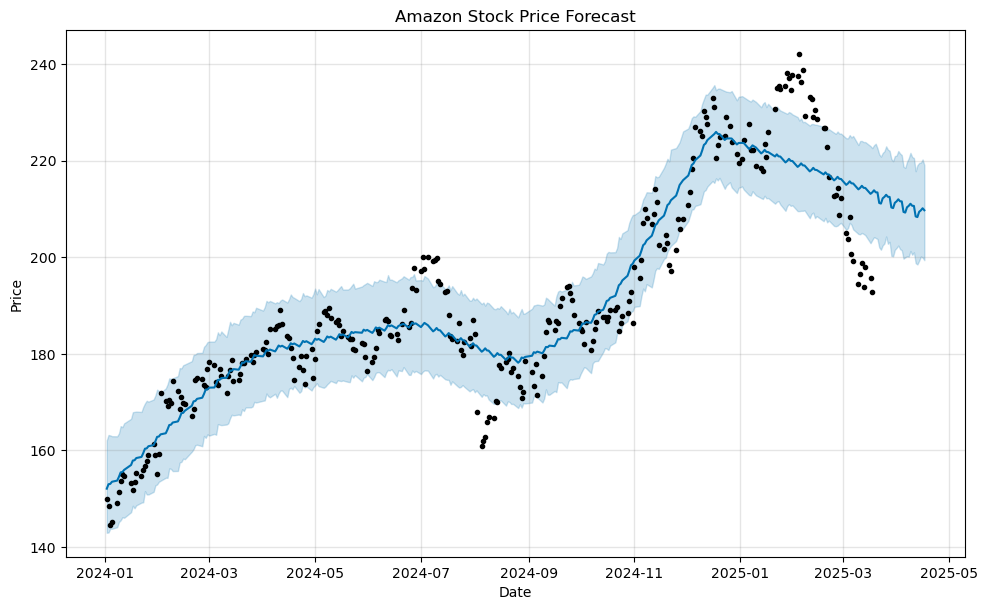

In [27]:
fig = model.plot(forecast)
plt.title("Amazon Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [28]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
303,2025-03-19,213.840638,204.139942,223.164756
304,2025-03-20,213.426117,203.967850,223.476077
305,2025-03-21,213.392677,203.748722,222.531042
306,2025-03-22,211.220297,202.043488,221.288773
307,2025-03-23,211.087495,201.531686,220.810919
308,2025-03-24,212.175663,202.437894,221.561574
309,2025-03-25,212.474828,202.826567,221.912273
310,2025-03-26,212.911031,204.280623,222.938217
311,2025-03-27,212.496510,202.764507,222.269306
312,2025-03-28,212.463070,203.161208,222.010647
